In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. 과대적합

## MNIST 데이터로 과대적합 문제를 해결해 봅시다!

In [2]:
# 라이브러리 불러오기
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [3]:
np.random.seed(10)
# 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 원핫인코딩
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


Epoch 1/700
70/70 [==============================] - 1s 5ms/step - loss: 2.2751 - accuracy: 0.0829 - val_loss: 2.2407 - val_accuracy: 0.1100
Epoch 2/700
70/70 [==============================] - 0s 2ms/step - loss: 2.2031 - accuracy: 0.1286 - val_loss: 2.1650 - val_accuracy: 0.1567
Epoch 3/700
70/70 [==============================] - 0s 2ms/step - loss: 2.1204 - accuracy: 0.1586 - val_loss: 2.0997 - val_accuracy: 0.2167
Epoch 4/700
70/70 [==============================] - 0s 2ms/step - loss: 2.0486 - accuracy: 0.2671 - val_loss: 2.0397 - val_accuracy: 0.2367
Epoch 5/700
70/70 [==============================] - 0s 3ms/step - loss: 1.9862 - accuracy: 0.2657 - val_loss: 1.9859 - val_accuracy: 0.2300
Epoch 6/700
70/70 [==============================] - 0s 2ms/step - loss: 1.9310 - accuracy: 0.2614 - val_loss: 1.9448 - val_accuracy: 0.2233
Epoch 7/700
70/70 [==============================] - 0s 2ms/step - loss: 1.8858 - accuracy: 0.2614 - val_loss: 1.9100 - val_accuracy: 0.2167
Epoch 8/700
7

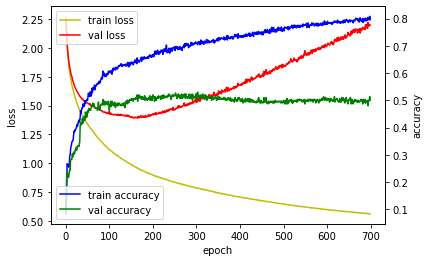

313/313 [==============================] - 1s 2ms/step - loss: 2.3832 - accuracy: 0.4735
 
loss:  2.3832051753997803
accuracy:  0.47350001335144043


In [4]:
# 모델 생성
model = Sequential()
model.add(Dense(units = 2, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# 모델 학습
hist = model.fit(X_train, y_train, epochs = 700, batch_size = 10, 	
                 validation_data=(X_val, y_val))

# 모델 학습과정 표시
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

# 모델 테스트
loss_and_metrics = model.evaluate(X_test, y_test, batch_size= 32)

print(' ')
print('loss: ' , loss_and_metrics[0])
print('accuracy: ', loss_and_metrics[1])

* 검증셋의 손실값(val_loss)를 보면 처음에 감소하다가 어느 순간부터 계속 증가하는 것을 볼 수 있습니다. 
* 이 때, 과적합이 발생한 것입니다.

## 문제 1-1. 그렇다면 EarlyStopping 적용해서 overfitting을 해결해봅시다! 
1. EarlyStopping
* 학습 종료 기준은 loss값 --> monitor = ?
* patience는 30으로 설정해주세요.
* mode는 자동으로 설정되게 해주세요.
2. ModelCheckpoint
* filepath는 'best_model.h5'로 지정해주세요.
* monitor는 위에서 쓴것과 같습니다.
* 성능이 향상된 모델만 저장하도록 save_best_only 파라미터를 설정해주세요.

Epoch 1/700
70/70 [==============================] - 1s 4ms/step - loss: 2.2915 - accuracy: 0.0871 - val_loss: 2.2806 - val_accuracy: 0.0900
Epoch 2/700
70/70 [==============================] - 0s 2ms/step - loss: 2.2413 - accuracy: 0.1157 - val_loss: 2.2412 - val_accuracy: 0.1167
Epoch 3/700
70/70 [==============================] - 0s 3ms/step - loss: 2.1867 - accuracy: 0.1357 - val_loss: 2.2019 - val_accuracy: 0.1533
Epoch 4/700
70/70 [==============================] - 0s 3ms/step - loss: 2.1361 - accuracy: 0.1600 - val_loss: 2.1555 - val_accuracy: 0.1833
Epoch 5/700
70/70 [==============================] - 0s 2ms/step - loss: 2.0843 - accuracy: 0.1857 - val_loss: 2.1180 - val_accuracy: 0.1900
Epoch 6/700
70/70 [==============================] - 0s 2ms/step - loss: 2.0375 - accuracy: 0.2100 - val_loss: 2.0816 - val_accuracy: 0.2100
Epoch 7/700
70/70 [==============================] - 0s 3ms/step - loss: 1.9920 - accuracy: 0.2314 - val_loss: 2.0466 - val_accuracy: 0.2333
Epoch 8/700
7

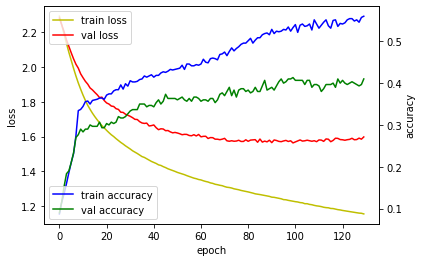

In [5]:
# 모델 생성
model = Sequential()
model.add(Dense(units = 2, input_dim = 28*28, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

###################  문제 1-1 (빈칸을 채워주세요) ##################################

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=30, mode='auto')
mc = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

# 모델학습
hist2 = model.fit(X_train, y_train, epochs = 700, batch_size = 10, 	
                 validation_data=(X_val, y_val), callbacks = [early_stopping, mc])

####################################################################################


# 모델 학습과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist2.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist2.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(hist2.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist2.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show

# 모델 테스트
loss_and_metrics = model.evaluate(X_test, y_test, batch_size = 32)

print(' ')
print('loss: ', loss_and_metrics[0])
print('accuracy: ', loss_and_metrics[1])

* patience 파라미터를 설정하니 저의 경우엔 130번째 epoch에서 학습이 종료되었고 overfitting이 어느정도 해결된것 같습니다.
* 뿐만 아니라 모델 성능도 이전보다 향상된 것을 볼 수 있습니다.

## Iris 데이터로 과대적합 문제를 해결해 봅시다!

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [7]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## 모델을 다음과 같이 구성했습니다.
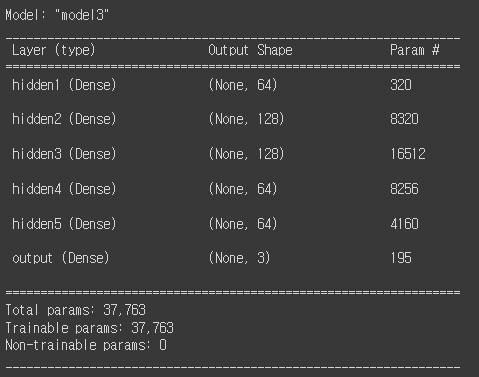

## 문제 1-2. 위 모델에 드롭아웃을 적용해봅시다!
* hidden4 layer의 드롭아웃 비율 : 0.3
* hidden5 layer의 드롭아웃 비율 : 0.25로 설정해주세요

In [12]:
################## 문제 1-2 ############################
# 드롭아웃 코드를 추가해주세요. 어느 위치에 추가해야될까요?
# 아래 설계도를 참고하세요 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model3 = Sequential(name = 'model3')

model3.add(Dense(64, activation='relu',name='hidden1',input_shape=(4,)))

model3.add(Dense(128, activation='relu',name='hidden2'))

model3.add(Dense(128, activation='relu',name='hidden3'))

model3.add(Dense(64, activation='relu',name='hidden4'))
model3.add(Dropout(0.3, name='dropout_4'))

model3.add(Dense(64, activation='relu',name='hidden5'))
model3.add(Dropout(0.25, name='dropout_5'))

model3.add(Dense(3, activation='softmax',name='output'))

model3.summary()

Model: "model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 64)                320       
                                                                 
 hidden2 (Dense)             (None, 128)               8320      
                                                                 
 hidden3 (Dense)             (None, 128)               16512     
                                                                 
 hidden4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 hidden5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0    

## 문제 1-3. Batch Normalization을 적용해봅시다.
* model3.add(BatchNormalization()) 를 알맞은 위치에 추가해주시면 됩니다.
* 힌트 : 아래 사진처럼 배치정규화는 각 hidden layer에서 활성함수 적용 직전에 사용


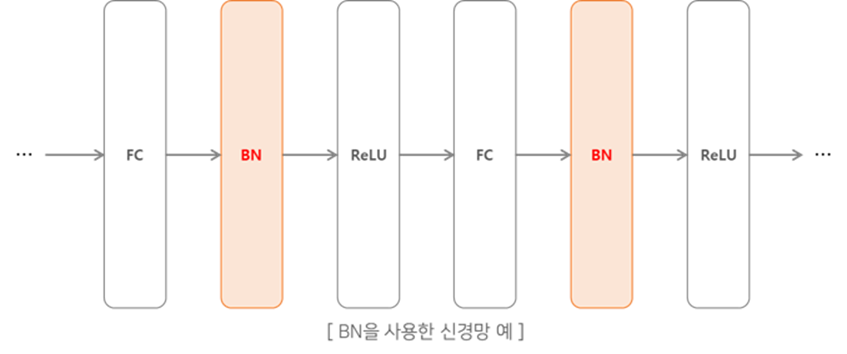

In [13]:
################## 문제 1-3 ############################
# Batch Normalization 코드를 각 은닉층에 추가해주세요.어느 위치에 추가해야 될까요?#
# model4.add(BatchNormalization()) 를 알맞은 위치에 추가해주시면 됩니다.
# 아래 설계도를 참고하세요

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
model4 = Sequential(name = 'model4')

model4.add(Dense(64, activation='relu',name='hidden1',input_shape=(4,)))
model4.add(BatchNormalization(name='batch_normalization')) # <-- 이런식으로 다른 hidden layer에 대해서도 코드를 추가해주세요

model4.add(Dense(128, activation='relu',name='hidden2'))
model4.add(BatchNormalization(name='batch_normalization_1'))

model4.add(Dense(128, activation='relu',name='hidden3'))
model4.add(BatchNormalization(name='batch_normalization_2'))

model4.add(Dense(64, activation='relu',name='hidden4'))
model4.add(BatchNormalization(name='batch_normalization_3'))

model4.add(Dense(64, activation='relu',name='hidden5'))
model4.add(BatchNormalization(name='batch_normalization_4'))

model4.add(Dense(3, activation='softmax',name='output'))

model4.summary()

Model: "model4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 64)                320       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 hidden2 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 hidden3 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512  

In [14]:
# 모델 학습
model4.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

hist4 = model4.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)


# 모델 테스트
loss_and_metrics = model4.evaluate(X_test, y_test, batch_size = 32)

print(' ')
print('loss: ', loss_and_metrics[0])
print('accuracy: ', loss_and_metrics[1])

Epoch 1/200
3/3 - 2s - loss: 1.3544 - accuracy: 0.4667 - val_loss: 1.0756 - val_accuracy: 0.3333 - 2s/epoch - 565ms/step
Epoch 2/200
3/3 - 0s - loss: 0.4445 - accuracy: 0.8889 - val_loss: 1.0804 - val_accuracy: 0.3333 - 34ms/epoch - 11ms/step
Epoch 3/200
3/3 - 0s - loss: 0.1947 - accuracy: 0.9778 - val_loss: 1.0773 - val_accuracy: 0.3333 - 35ms/epoch - 12ms/step
Epoch 4/200
3/3 - 0s - loss: 0.1486 - accuracy: 0.9778 - val_loss: 1.0645 - val_accuracy: 0.3333 - 33ms/epoch - 11ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0928 - accuracy: 0.9889 - val_loss: 1.0525 - val_accuracy: 0.3333 - 34ms/epoch - 11ms/step
Epoch 6/200
3/3 - 0s - loss: 0.1083 - accuracy: 0.9667 - val_loss: 1.0399 - val_accuracy: 0.3333 - 34ms/epoch - 11ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0756 - accuracy: 0.9667 - val_loss: 1.0293 - val_accuracy: 0.3333 - 39ms/epoch - 13ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0773 - accuracy: 0.9778 - val_loss: 1.0253 - val_accuracy: 0.3333 - 38ms/epoch - 13ms/step
Epoch 9/200
3/3 - 0s - lo

* 이렇게 드롭아웃과 배치정규화를 모두 사용해보았습니다.
* 이 둘을 동시에 사용하려면 보통 [ 배치정규화->활성함수->드롭아웃 ] 순으로 은닉층 연산이 진행됩니다.

# CNN

## CNN은 기존 신경망의 어떤 단점을 극복하고자 나온 기법인가요?  
답안 : 기존 신경망은 이미지를 하나로 vectorize하기 때문에 인접 픽셀 간의 연관성을 잃기 쉽습니다. 이를 보안하기 위해 kernel이라는 개념을 도입하고 실제 시각 신경망과 유사하게 고안한 네트워크가 CNN입니다. (reception field, ...)

## CNN의 학습 과정을 간단하게 적어주세요!  (흑백 이미지일 때와 컬러 이미지일 때의 차이점도 적어주세요!)  
답안 :  여러 개의 kernel을 이용하여 input 이미지의 정보를 추출해냅니다. 이 때 하나의 kerenl은 하나의 feature map을 생성하며 따라서 kernel의 수가 channel 수가 됩니다. 

흑백 이미지의 경우 input channel 수가 1이며 컬러 이미지의 경우 input channel 수가 3이 됩니다. 따라서 input 이미지에 적용되는 kernel의 channel 방향 dimension이 흑백 이미지일 경우에는 1, 컬러 이미지일 경우에는 3이 됩니다.

CNN은 이미지의 정보를 잘 추출해내기 위해 kernel의 parameter를 학습합니다.


In [1]:
## 컬러 이미지 데이터 셋 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import keras

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import numpy as np

(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

## 주어진 이미지의 shape 확인
X_train_full.shape   ## 50,000장의 32x32 형태의 컬러이미지 (chanel=3) 인 것을 확인 !! 

170508288/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

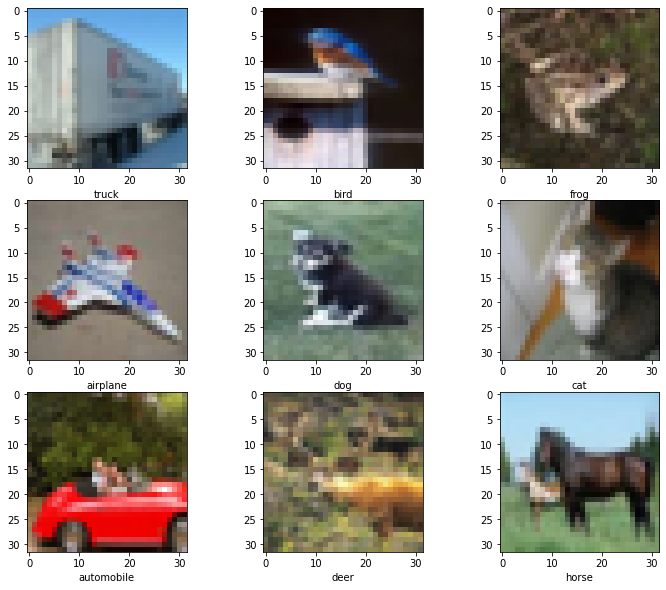

In [2]:
## 데이터가 어떻게 생겼는지 확인

class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

plt.figure(figsize=(12,10))
for idx, i in enumerate([15,13,22,30,70,101,99,98,12]) :
    plt.subplot(3,3, idx+1)
    plt.imshow(X_train_full[i])
    plt.xlabel(class_names[int(y_train_full[i])])
    
plt.show()

In [3]:
X_mean = np.mean(X_train_full, axis=(0,1,2))
X_std = np.std(X_train_full, axis=(0,1,2))
X_train_full = (X_train_full-X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2)

## 예습과제에 나왔던 모델을 이용하여 학습까지 진행해주세요! 다만 input_shape을 변경해야할 것같은데, 어떻게 변경해야할까요? 

답안 : 위에서 이용했던 신경망과 달리 하나의 이미지를 vectorizing하지 않기 때문에 (32, 32, 3)의 input shape을 가집니다. 

In [4]:
## 우리가 예습과제에 사용했던 모델을 먼저 써볼겁니다!
basic = keras.models.Sequential([
    keras.layers.Conv2D(64, (7,7), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),

    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])


basic.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


history = basic.fit(X_train, y_train, 
                   epochs = 30,
                   batch_size = 32,
                   validation_data = (X_val, y_val))

Epoch 1/30
1250/1250 [==============================] - 25s 9ms/step - loss: 1.9446 - accuracy: 0.2526 - val_loss: 1.5910 - val_accuracy: 0.4051
Epoch 2/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5912 - accuracy: 0.4098 - val_loss: 1.3960 - val_accuracy: 0.4968
Epoch 3/30
1250/1250 [==============================] - 9s 8ms/step - loss: 1.4278 - accuracy: 0.4867 - val_loss: 1.2348 - val_accuracy: 0.5617
Epoch 4/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3078 - accuracy: 0.5349 - val_loss: 1.1748 - val_accuracy: 0.5775
Epoch 5/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2185 - accuracy: 0.5736 - val_loss: 1.1010 - val_accuracy: 0.6199
Epoch 6/30
1250/1250 [==============================] - 9s 8ms/step - loss: 1.1420 - accuracy: 0.6068 - val_loss: 1.0540 - val_accuracy: 0.6341
Epoch 7/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0801 - accuracy: 0.6300 - val_loss: 1.0047 - val_accu

## 아래의 그림은 history로 그린 모델의 학습 plot입니다. 그래프를 보고, 우리 모델이 가지는 문제점과 개선점을 적어주세요!

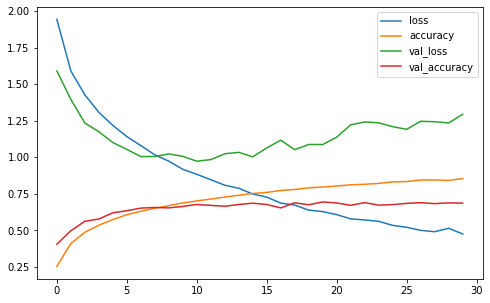

In [5]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid = True
plt.gca()
plt.show()

In [6]:
score = basic.evaluate(X_test, y_test)
print('Test Score : ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.3418 - accuracy: 0.6820
Test Score :  0.6819999814033508


답안 : epoch수가 증가할수록 val_loss가 증가하는 것을 보아, 본 model은 overfitting되었음을 유추할 수 있다.

## 위에서 제시한 방법으로 모델을 재구성 해보세요! 목표는 Test score를  어떻게든 향상시키기만 하면 됩니다! 정해진 정답은 없으니, 여러분의 창의력을 발휘해서 모델을 자유롭게 구상하시면 됩니다 :)

In [9]:
''' !!! Here Your MODEL !!! '''
mymodel = keras.models.Sequential([
    keras.layers.Conv2D(64, (7,7), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),

    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])


mymodel.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


mymodel_history = mymodel.fit(X_train, y_train, 
                   epochs = 30,
                   batch_size = 32,
                   validation_data = (X_val, y_val))

Epoch 1/30
1250/1250 [==============================] - 13s 9ms/step - loss: 1.8544 - accuracy: 0.3483 - val_loss: 1.4390 - val_accuracy: 0.4640
Epoch 2/30
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3709 - accuracy: 0.5115 - val_loss: 1.2532 - val_accuracy: 0.5613
Epoch 3/30
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1487 - accuracy: 0.6038 - val_loss: 1.0647 - val_accuracy: 0.6288
Epoch 4/30
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9833 - accuracy: 0.6677 - val_loss: 0.8300 - val_accuracy: 0.7115
Epoch 5/30
1250/1250 [==============================] - 11s 8ms/step - loss: 0.8685 - accuracy: 0.7085 - val_loss: 0.7417 - val_accuracy: 0.7379
Epoch 6/30
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7581 - accuracy: 0.7485 - val_loss: 0.7055 - val_accuracy: 0.7581
Epoch 7/30
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6537 - accuracy: 0.7834 - val_loss: 0.6814 - val_ac

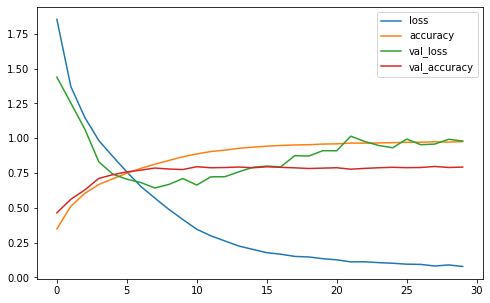

In [10]:
pd.DataFrame(mymodel_history.history).plot(figsize=(8,5))
plt.grid = True
plt.gca()
plt.show()

In [11]:
myscore = mymodel.evaluate(X_test, y_test)
print('Test Score : ', myscore[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.0337 - accuracy: 0.7843
Test Score :  0.7843000292778015


## 문제 1

##### 필터 시각화에서 주로 첫 번째 컨볼루션 레이어를 목표로하는 이유는???

답 : 초기 feature map들을 살펴보면, 캐치하는 영역이 명확하게 보이지만 네트워크의 후반부로 갈수록 해석 불가능한 형태를 띠기 때문입니다.

## 문제 2

##### 2-1. high layer에 사용하는 CNN 시각화 기법을 하나 이상 적어주세요.

답 : Dimensionality reduction 이후, t-SNE 기법을 이용하여 High dimensional feature를 2차원 상에 각 클래스마다 다른 색으로 표현해볼 수 있습니다.

##### 2-2. mid layer에 사용하는 CNN 시각화 기법을 하나 이상 적어주세요.

답 : Maximally activating patches 
- 네트워크 상에서 분석하고 싶은 layer와 channel을 선택하고 예제 data를 네트워크에 넣어 각 layer의 activation을 얻습니다. 이후, 해당 channel의 activation 중
가장 큰 값을 갖는 위치를 파악해 그 값을 도출해낸 receptive field를 찾아 출력해보는 시각화 기법입니다.

## 문제 3

##### occlusion map 에서 히트 맵이 의미하는 바는 무엇인가요???

답 : image의 특정 영역을 occlusion 했을 때 전체 image를 정확한 class로 판별할 확률을 heatmap으로 만들었으므로, 특정 image가 주어졌을 때 그 image가 제대로 판정되기 위한 각 영역의 중요도를 의미합니다.